In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt



In [13]:
df = pd.read_csv('prices.txt', sep='\s+', header=None)

In [14]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    keys = data.columns
    pairs = []

    for i in range(n):
        for j in range(i+1, n):
            S1 = data.iloc[:, i]
            S2 = data.iloc[:, j]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]

            if pvalue < 0.01:
                pairs.append((keys[i], keys[j], pvalue))

Score Matrix:
 [[ 0.         -1.75407946 -1.27943894 ... -1.56878496 -1.53236176
  -1.44969087]
 [ 0.          0.         -1.86670578 ... -1.19095233 -1.23741435
  -1.26978467]
 [ 0.          0.          0.         ... -1.52179768 -1.19022636
  -1.87510736]
 ...
 [ 0.          0.          0.         ...  0.         -1.96680293
  -2.38161472]
 [ 0.          0.          0.         ...  0.          0.
  -1.90232985]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
P-value Matrix:
 [[1.         0.65174725 0.83585411 ... 0.73388339 0.74857469 0.77997395]
 [1.         1.         0.59679264 ... 0.86025418 0.84782962 0.83866797]
 [1.         1.         1.         ... 0.75273902 0.86044162 0.59257665]
 ...
 [1.         1.         1.         ... 1.         0.54578526 0.33361141]
 [1.         1.         1.         ... 1.         1.         0.57882471]
 [1.         1.         1.         ... 1.         1.         1.        ]]
Cointegrated Pairs:
 [(np.int64(1), np.int64(10)

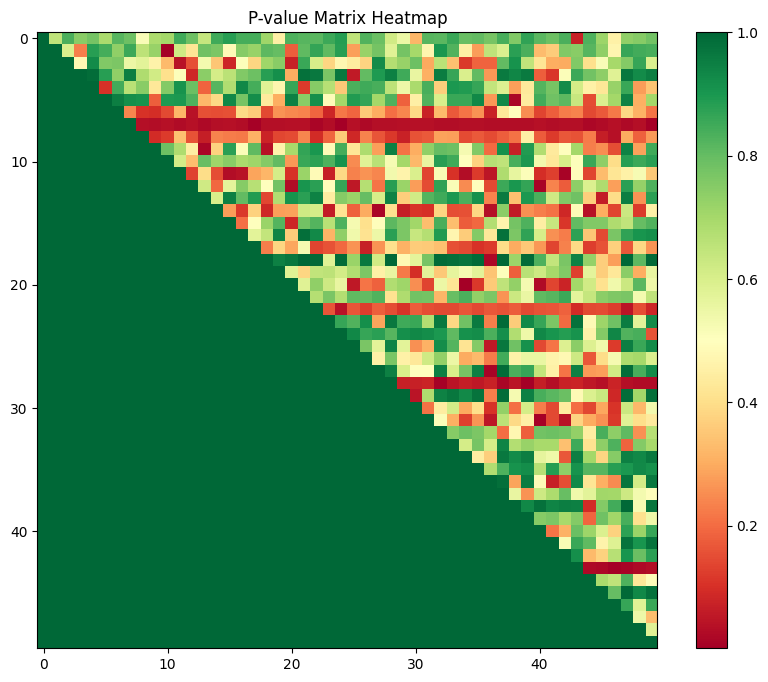

In [15]:
df = pd.read_csv('prices.txt', sep='\s+', header=None)

find_cointegrated_pairs(df)

In [16]:
sorted_pairs = sorted(pairs, key=lambda x: x[2])

for pair in sorted_pairs:
    print(f"Pair: {pair[0]} & {pair[1]}, P-value: {pair[2]}")

Pair: 7 & 49, P-value: 0.0012064436131522954
Pair: 7 & 24, P-value: 0.0015981915576907418
Pair: 1 & 10, P-value: 0.0027241699105323078
Pair: 20 & 34, P-value: 0.0035422318051808546
Pair: 28 & 39, P-value: 0.004703702813263103
Pair: 43 & 46, P-value: 0.005073191463362415
Pair: 28 & 32, P-value: 0.006557791265859281
Pair: 7 & 17, P-value: 0.008112075796594481
Pair: 31 & 40, P-value: 0.008979147540014203
Pair: 43 & 47, P-value: 0.009659430481229206
Pair: 27 & 36, P-value: 0.009775168406716722
